In [1]:
# Physics 381: Computational Physics I
# Assignment 4: Fourier Analysis Using Python
# Instructor Claudia Gomes da Rocha
# Members: Owen Doty (30002341), Christian Keenan (30038919), Nolan Wick (30101171), Sharar Sifat (30052303)
# Date: March 31, 2021

In [2]:
# Exercise 1.2a

import numpy as np
import math

# The Simpson's Rule code below was obtained from simpson_exp_test in the Physics 381 D2L shell.
def f(x):
    # remember: functions need a return.
    return np.exp(x)


def simpson(fun, a, b, n):
    h = (b-a)/float(n)
    
    x0 = a
    xn = b
    
    y0 = fun(x0)
    yn = fun(xn)
    
    # sum over even indexes of x and sum over odd indexes of x
    feven = 0.0
    fodd = 0.0
    
    for j in range(2,n,2):
        xeven = a + j*h
        feven += fun(xeven)
        
        xodd = a + (j-1)*h
        fodd += fun(xodd)
        
    # range method above does not include the last odd term
    xodd = a + (n-1)*h
    fodd += fun(xodd)
    
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# integration test
a = 0.0
b = 1.0
n = 100

Int_simp = simpson(f, a, b, n)

Int_analytical = math.exp(1.0) - 1.0

error = abs(Int_analytical - Int_simp)

print(Int_simp, Int_analytical, error)

1.7182818285545043 1.718281828459045 9.545919610332021e-11


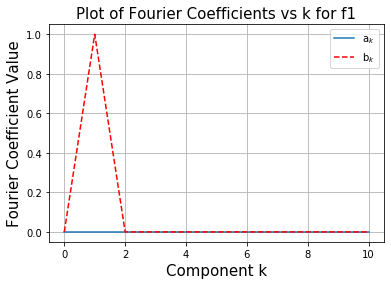

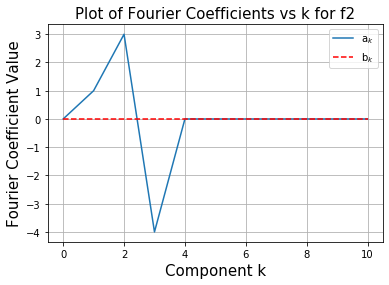

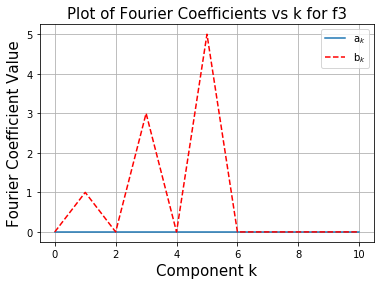

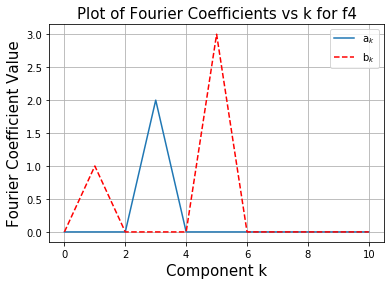

In [ ]:
# Exercise 1.2 b 

from math import *
import matplotlib.pyplot as plt
import numpy as np

# constants to be defined

omega = 1
T = (2*pi)/omega
kMax = 10 

# Defining the simpson rule integration method
    
def simpson(fun, a, b, n):
    
    h = (b-a)/float(n)
    
    t0 = a 
    tn = b
    
    y0 = fun(t0)
    yn = fun(tn)
    
    # sum over even indexes of x and sum over odd indexes of x
    feven = 0.0
    fodd = 0.0
    
    for j in range(2,n,2):
        
        teven = a + j*h 
        feven += fun(teven)
        
        todd = a + (j-1)*h
        fodd += fun(todd)
        
    # range method above does not include the last odd term
    todd = a + (n-1)*h
    fodd += fun(todd)
    
    intfun = h*(y0+2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun

# defining the functions to be integrated

def f1(t):
    return sin(omega*t)
def f2(t):
    return cos(omega*t)+3*cos(2*omega*t)-4*cos(3*omega*t)
def f3(t):
    return sin(omega*t)+3*sin(3*omega*t)+5*sin(5*omega*t)
def f4(t):
    return sin(omega*t)+2*cos(3*omega*t)+3*sin(5*omega*t)

# integration
a = 0.0
b = T
n = 100

# defining a0, ak, and bk functions
def ak_f1(t):
    return f1(t)*cos(k*omega*t)
def bk_f1(t):
    return f1(t)*sin(k*omega*t)

def ak_f2(t):
    return f2(t)*cos(k*omega*t)
def bk_f2(t):
    return f2(t)*sin(k*omega*t)

def ak_f3(t):
    return f3(t)*cos(k*omega*t)
def bk_f3(t):
    return f3(t)*sin(k*omega*t)

def ak_f4(t):
    return f4(t)*cos(k*omega*t)
def bk_f4(t):
    return f4(t)*sin(k*omega*t)

kList= []
ak_f1List = []
ak_f2List = []
ak_f3List = []
ak_f4List = []
bk_f1List = []
bk_f2List = []
bk_f3List = []
bk_f4List = []

result_a01 = (1/T)*simpson(f1,a,b,n)
result_a02 = (1/T)*simpson(f2,a,b,n)
result_a03 = (1/T)*simpson(f3,a,b,n)
result_a04 = (1/T)*simpson(f4,a,b,n)

ak_f1List.append(result_a01)
ak_f2List.append(result_a02)
ak_f3List.append(result_a03)
ak_f4List.append(result_a04)


for k in range(0,kMax+1):
    kList.append(k)
    if k == 0:
        result_bk1 = (2/T)*simpson(bk_f1,a,b,n)
        result_bk2 = (2/T)*simpson(bk_f2,a,b,n)
        result_bk3 = (2/T)*simpson(bk_f3,a,b,n)
        result_bk4 = (2/T)*simpson(bk_f4,a,b,n)
        bk_f1List.append(result_bk1)
        bk_f2List.append(result_bk2)
        bk_f3List.append(result_bk3)
        bk_f4List.append(result_bk4)
    
    else:
        result_ak1 = (2/T)*simpson(ak_f1,a,b,n)
        result_bk1 = (2/T)*simpson(bk_f1,a,b,n)
        result_ak2 = (2/T)*simpson(ak_f2,a,b,n)
        result_bk2 = (2/T)*simpson(bk_f2,a,b,n)
        result_ak3 = (2/T)*simpson(ak_f3,a,b,n)
        result_bk3 = (2/T)*simpson(bk_f3,a,b,n)
        result_ak4 = (2/T)*simpson(ak_f4,a,b,n)
        result_bk4 = (2/T)*simpson(bk_f4,a,b,n)
        ak_f1List.append(result_ak1)
        ak_f2List.append(result_ak2)
        ak_f3List.append(result_ak3)
        ak_f4List.append(result_ak4)
        bk_f1List.append(result_bk1)
        bk_f2List.append(result_bk2)
        bk_f3List.append(result_bk3)
        bk_f4List.append(result_bk4)
        

# Plot for function 1
plt.plot(kList,ak_f1List,label="a$_k$")
plt.plot(kList,bk_f1List,"r--",label="b$_k$")
plt.title("Plot of Fourier Coefficients vs k for f1", fontsize=15)
plt.xlabel("Component k",fontsize=15)
plt.ylabel("Fourier Coefficient Value", fontsize=15)
plt.grid()
plt.legend()
plt.savefig("381A4_1b_f1")
plt.show()

# Plot for function 2 
plt.plot(kList,ak_f2List,label="a$_k$")
plt.plot(kList,bk_f2List,"r--",label="b$_k$")
plt.xlabel("Component k",fontsize=15)
plt.ylabel("Fourier Coefficient Value", fontsize=15)
plt.legend()
plt.title("Plot of Fourier Coefficients vs k for f2",fontsize=15)
plt.grid()
plt.savefig("381A4_1b_f2")
plt.show()

#Plot for function 3
plt.plot(kList,ak_f3List,label="a$_k$")
plt.plot(kList,bk_f3List,"r--",label="b$_k$")
plt.legend()
plt.title("Plot of Fourier Coefficients vs k for f3",fontsize=15)
plt.xlabel("Component k",fontsize=15)
plt.ylabel("Fourier Coefficient Value", fontsize=15)
plt.grid()
plt.savefig("381A4_1b_f3")
plt.show()

# Plot for function 4
plt.plot(kList,ak_f4List,label="a$_k$")
plt.plot(kList,bk_f4List,"r--",label="b$_k$")
plt.legend()
plt.title("Plot of Fourier Coefficients vs k for f4",fontsize=15)
plt.xlabel("Component k",fontsize=15)
plt.ylabel("Fourier Coefficient Value", fontsize=15)
plt.grid()
plt.savefig("381A4_1b_f4")
plt.show()

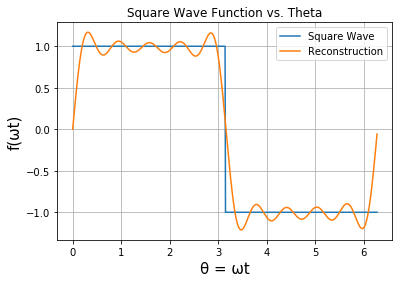

In [ ]:
#Excercise 1.2c
from scipy import signal


def simpson(fun, a, b, n):
    h = (b-a)/float(n)
    
    x0 = a
    xn = b
    
    y0 = fun(x0)
    yn = fun(xn)
    
    # sum over even indexes of x and sum over odd indexes of x
    feven = 0.0
    fodd = 0.0
    
    for j in range(2,n,2):
        xeven = a + j*h
        feven += fun(xeven)
        
        xodd = a + (j-1)*h
        fodd += fun(xodd)
        
    # range method above does not include the last odd term
    xodd = a + (n-1)*h
    fodd += fun(xodd)
    
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun


def fak(k):
  def fa(t):
    return(squarewave(t)*cos(k*omega*t))
  return((2/T)*simpson(fa,a,b,n))

  
def fbk(k):
  def fb(t):
    return(squarewave(t)*sin(k*omega*t))
  return((2/T)*simpson(fb,a,b,n))

 
omega = 1
T = (2*pi)/omega
a = 0
b = T
n = 100
nc = 10

def squarewave(t):
  theta = omega*t
  if 0 <= theta <= (pi):
    return 1
    
  if pi < theta <= (2*pi):
    return -1


a0 = (1/T)*simpson(squarewave,a,b,n)
aList = [a0]
bList = []
coefficient_range = range(1, nc+1)


for k in coefficient_range:
  ak = fak(k)
  bk = fbk(k)
  aList.append(ak)
  bList.append(bk)


tList = np.linspace(0,2*pi,700,endpoint=False)
fList = []
fx = []
for t in tList:
  fx.append(signal.square(omega*t))

for t in tList:
  theta = omega*t
  function = a0
  for n in coefficient_range:
    function += aList[n-1]*cos(n*theta) + bList[n-1]*sin(n*theta)
  fList.append(function)


plt.plot(tList,fx, label = "Square Wave")
plt.plot(tList,fList, label = "Reconstruction")
plt.title("Square Wave Function vs. Theta")
plt.xlabel('θ = ωt', fontsize=15)
plt.ylabel('f(ωt)', fontsize=15)
plt.legend()
plt.grid()
plt.show()

aList.clear()

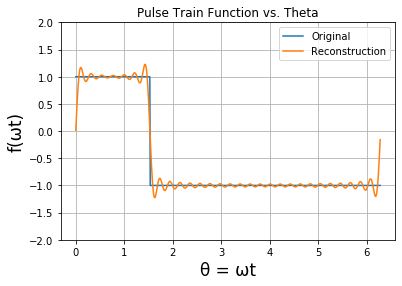

In [ ]:
# Section 1.2d

import matplotlib.pylab as plt
import numpy as np
import math
from scipy import signal


def simpson(fun, a, b, n):
    h = (b-a)/float(n)
    
    x0 = a
    xn = b
    
    y0 = fun(x0)
    yn = fun(xn)
    
    # sum over even indexes of x and sum over odd indexes of x
    feven = 0.0
    fodd = 0.0
    
    for j in range(2,n,2):
        xeven = a + j*h
        feven += fun(xeven)
        
        xodd = a + (j-1)*h
        fodd += fun(xodd)
        
    # range method above does not include the last odd term
    xodd = a + (n-1)*h
    fodd += fun(xodd)
    
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun


def fak(k):
  def fa(t):
    return(square_f(t)*np.cos(k*omega*t))
  return((2/T)*simpson(fa,a,b,n))

  
def fbk(k):
  def fb(t):
    return(square_f(t)*np.sin(k*omega*t))
  return((2/T)*simpson(fb,a,b,n))

 
omega = 1
T = (2*math.pi)/omega
a = 0
b = T
n = 100
nc = 30
alpha = 4
omega_tau = (2*math.pi)/alpha
 


def square_f(t):
  theta = omega * t 
  
  if 0 <= (theta) <= (omega_tau):
    return 1
    
  if theta > omega_tau:
    return -1



a0 = (1/T)*simpson(square_f,a,b,n) 
aList = [a0]
bList = [0]
coefficient_range = range(1, nc+1)


for k in coefficient_range:
  ak = fak(k)
  bk = fbk(k)
  aList.append(ak)
  bList.append(bk)


tList = np.linspace(0,2*math.pi,700,endpoint=False)
fList = []


for t in tList:
  theta = omega*t
  function = a0
  for n in coefficient_range:
    function += aList[n]*np.cos(n*theta) + bList[n]*np.sin(n*theta)
  fList.append(function)


plt.plot(tList,signal.square(fList),label='Original')
plt.plot(tList,fList,label='Reconstruction')
plt.ylim(-2,2)
plt.legend()
plt.xlabel("θ = ωt", fontsize=17)
plt.ylabel("f(ωt)", fontsize=17)
plt.grid()
plt.title("Pulse Train Function vs. Theta")
plt.show()




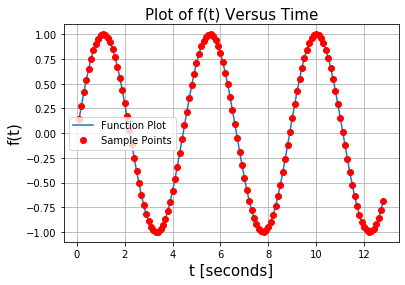

In [ ]:
# Part 2.2

# Question a 
# Part 1
# constants defined
N = 128
h = 0.1
tau = N*h 
t = 0

sineList = []
tList = []

def sine_function(t):
    return sin(0.45*pi*t)

for n in range(128):
    sine_function(t)
    t += h
    sineList.append(sine_function(t))
    tList.append(t)
    
plt.plot(tList,sineList,label="Function Plot")
plt.plot(tList,sineList,"ro",label="Sample Points")
plt.grid()
plt.title("Plot of f(t) Versus Time", fontsize=15)
plt.xlabel('t [seconds]', fontsize=15)
plt.ylabel('f(t)', fontsize=15)
plt.legend()
plt.savefig("381A4_2a_p1") 
plt.show()


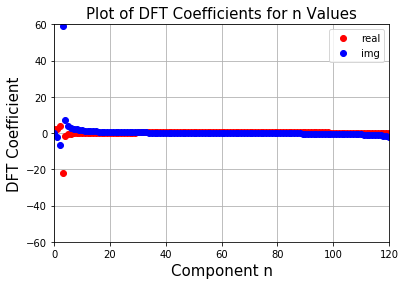

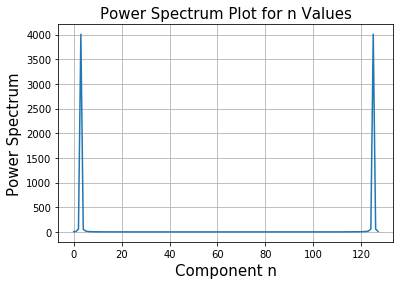

In [ ]:
# Part 2.2
# Question a 
# Part 2

realFnList = []
imFnList = []
nList = []
powerList = []

for nValues in range(0,N):
    real_Fn = 0 
    im_Fn = 0 
    for mValues in range(0,N):
        real_Fn += sine_function(mValues*h)*cos((2*pi*mValues*nValues)/N)
        im_Fn += sine_function(mValues*h)*sin((2*pi*mValues*nValues)/N)
    realFnList.append(real_Fn)
    imFnList.append(im_Fn)
    nList.append(nValues)

for i in range(len(realFnList)):
    power = (realFnList[i]**2 + imFnList[i]**2)
    powerList.append(power)
    
plt.plot(nList,realFnList,'ro',label='real')
plt.plot(nList,imFnList,'bo',label='img')
plt.xlabel("Component n",fontsize=15)
plt.ylabel("DFT Coefficient",fontsize=15)
plt.title("Plot of DFT Coefficients for n Values",fontsize=15)
plt.grid()
plt.axis((0,120,-60,60))
plt.legend()
plt.savefig("381A4_2a_p2_1")
plt.show()

plt.plot(nList,powerList)
plt.xlabel("Component n",fontsize=15)
plt.ylabel("Power Spectrum",fontsize=15)
plt.title("Power Spectrum Plot for n Values",fontsize=15)
plt.grid()
plt.savefig("381A4_2a_p2_2")
plt.show()

In [ ]:
# Part 2.2 
# Question a
# Part 3


#Calculating the dominant Fourier component
Dominant_comp= max(realFnList)
print("The value of the dominant Fourier component is",Dominant_comp)


The value of the dominant Fourier component is 4.041958116210786


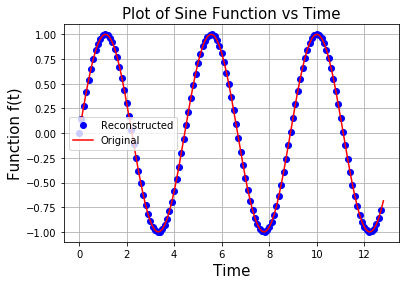

In [ ]:
# Part 2.2
# Question a 
# Part 4
reconList = []
timeList = []
for mVals in range(0,N):
    recon = 0
    timeList.append(mVals*h)
    for nVals in range(0,N):
        recon += (1/N)*(realFnList[nVals]*cos((2*pi*mVals*nVals)/N)+ imFnList[nVals]*sin((2*pi*mVals*nVals)/N))
    reconList.append(recon)

plt.plot(timeList,reconList,"bo",label="Reconstructed")
plt.plot(tList,sineList,"r",label="Original")
plt.legend()
plt.xlabel("Time",fontsize=15)
plt.ylabel("Function f(t)",fontsize=15)
plt.title("Plot of Sine Function vs Time",fontsize=15)
plt.grid()
plt.savefig("381A4_2a_p4")
plt.show()

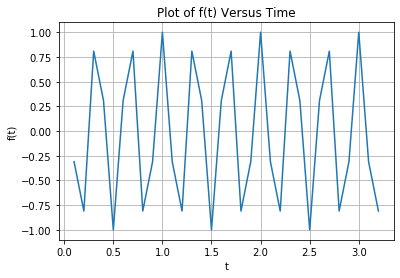

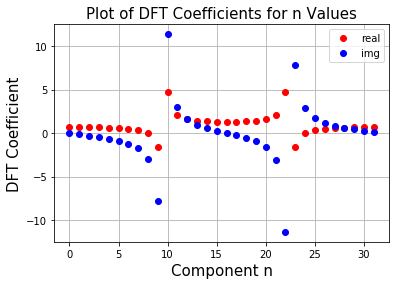

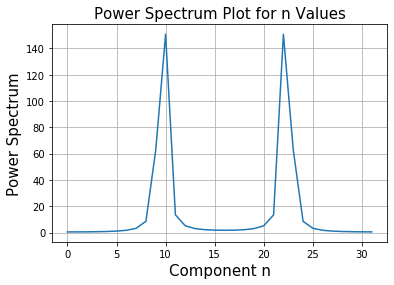

The value of the dominant Fourier component is 4.698753268800813


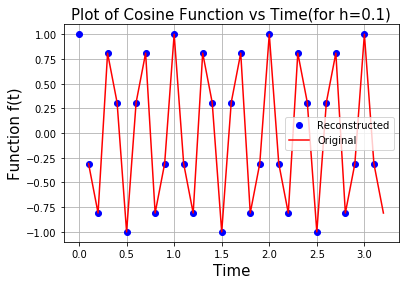

In [ ]:
#Question 2.2 part 5

#i)
N = 32
h = 0.1
tau = N*h 
t = 0

cosList = []
tList = []

def cos_function(t):
    return cos(6*pi*t)

for n in range(32):
    cos_function(t)
    t += h
    cosList.append(cos_function(t))
    tList.append(t)
    
plt.plot(tList,cosList)
plt.grid()
plt.title("Plot of f(t) Versus Time")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()



#ii)

realFnList = []
imFnList = []
nList = []
powerList = []

for nValues in range(0,N):
    real_Fn = 0 
    im_Fn = 0 
    for mValues in range(0,N):
        real_Fn += cos_function(mValues*h)*cos((2*pi*mValues*nValues)/N)
        im_Fn += cos_function(mValues*h)*sin((2*pi*mValues*nValues)/N)
    realFnList.append(real_Fn)
    imFnList.append(im_Fn)
    nList.append(nValues)

for i in range(len(realFnList)):
    power = (realFnList[i]**2 + imFnList[i]**2)
    powerList.append(power)
    
plt.plot(nList,realFnList,'ro',label='real')
plt.plot(nList,imFnList,'bo',label='img')
plt.xlabel("Component n",fontsize=15)
plt.ylabel("DFT Coefficient",fontsize=15)
plt.title("Plot of DFT Coefficients for n Values",fontsize=15)
plt.grid()
plt.legend()
plt.savefig("381A4_2a_p2_1")
plt.show()

plt.plot(nList,powerList)
plt.xlabel("Component n",fontsize=15)
plt.ylabel("Power Spectrum",fontsize=15)
plt.title("Power Spectrum Plot for n Values",fontsize=15)
plt.grid()
plt.savefig("381A4_2a_p2_2")
plt.show()

#iii)
#Calculating the dominant Fourier component
Dominant_comp= max(realFnList)
print("The value of the dominant Fourier component is",Dominant_comp)


#iv)
reconList = []
timeList = []
for mVals in range(0,N):
    recon = 0
    timeList.append(mVals*h)
    for nVals in range(0,N):
        recon += (1/N)*(realFnList[nVals]*cos((2*pi*mVals*nVals)/N)+ imFnList[nVals]*sin((2*pi*mVals*nVals)/N))
    reconList.append(recon)

plt.plot(timeList,reconList,"bo",label="Reconstructed")
plt.plot(tList,cosList,"r",label="Original")
plt.legend()
plt.xlabel("Time",fontsize=15)
plt.ylabel("Function f(t)",fontsize=15)
plt.title("Plot of Cosine Function vs Time(for h=0.1)",fontsize=15)
plt.grid()
plt.savefig("381A4_2a_p5")
plt.show()

The length of the pitch list is: 1024


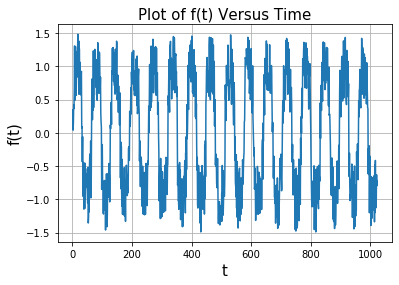

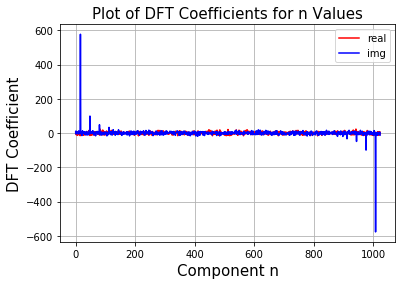

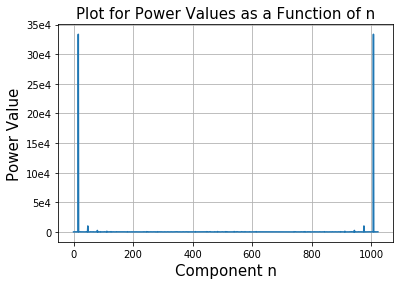

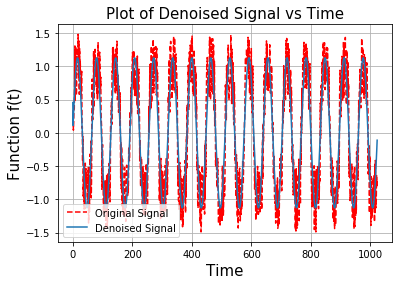

In [ ]:
# Part 2.2
# Question b

# creating an empty list for the pitch data from the pitch.txt file
pitchList = []

# creating lists for the time and the signal 
timeList = []
signalList = []

# opening and reading the pitch.txt file, and adding each element to pitchList
file = open("pitch.txt", "r")
content = file.readlines()

for line in content:
    line = line.strip("\n")
    pitchList.append(float(line))

# closing the file after the values are appended to pitchList
file.close()

# initial constants being defined 

N = 1024
h = 1
tau = N*h 
t = 0

# function that finds the pitch value in pitchList in position "t"
def function(t):
    return pitchList[t]
 
# this finds the length of the pitch list, so we can use the value in the loop below
print("The length of the pitch list is:",len(pitchList))

# this for loop appends a value from the pitch list corresponding to the time, t
for n in range(1023):
    function(t)
    t += h
    signalList.append(function(t))
    timeList.append(t)

# this plots the signal as a function of time 
plt.plot(timeList,signalList)
plt.grid()
plt.title("Plot of f(t) Versus Time",fontsize=15)
plt.xlabel('t',fontsize=15)
plt.ylabel('f(t)',fontsize=15)
plt.savefig("PHYS381A4_2bPlot1")
plt.show()


# empty lists defined for n values, the Fourier components, and the power spectrum values

realListFn = []
imListFn = []
nValueList = []
powerValueList = []

# this loop iterates through until the maximum N value is reached. It finds the Fourier components for the pitch values multiplied by their respective trigonometric functions
for nValue in range(0,N):
    real_FnValue = 0 
    im_FnValue = 0 
    for mValue in range(0,N):
        real_FnValue += function(mValue*h)*cos((2*pi*mValue*nValue)/N)
        im_FnValue += function(mValue*h)*sin((2*pi*mValue*nValue)/N)
    realListFn.append(real_FnValue)
    imListFn.append(im_FnValue)
    nValueList.append(nValue)

# the following loop calculates the power values by iterating through each list and appending the sum of each list value squared
for i in range(len(realListFn)):
    powerValue = (realListFn[i]**2 + imListFn[i]**2)
    powerValueList.append(powerValue)

# the real and imaginary Fourier components are plotted as a function of n 
plt.plot(nValueList,realListFn,'r',label='real')
plt.plot(nValueList,imListFn,'b',label='img')
plt.xlabel("Component n", fontsize=15)
plt.ylabel("DFT Coefficient",fontsize=15)
plt.title("Plot of DFT Coefficients for n Values",fontsize=15)
plt.grid()
plt.legend()
plt.savefig("PHYS381A4_2bPlot2")
plt.show()

# the power spectrum is plotted as a function of n here:
plt.plot(nValueList,powerValueList)
plt.xlabel("Component n", fontsize=15)
plt.ylabel("Power Value",fontsize=15)
plt.title("Plot for Power Values as a Function of n",fontsize=15)
plt.grid()
plt.yticks(ticks=[0,5e4,10e4,15e4,20e4,25e4,30e4,35e4], labels=["0","5e4","10e4","15e4","20e4","25e4","30e4","35e4"])
plt.savefig("PHYS381A4_2bPlot3")
plt.show()

# the code below "denoises" the signal
# this is done by reconstructing the signal utilizing the DFT reconstruction formula presented in the problem text

denoisedList = []
t_List = []
epsilon = 550
for mVal in range(0,N):
    denoise = 0
    t_List.append(mVal*h)
    for nVal in range(0,N):
        denoise += (1/N)*(realListFn[nVal]*cos((2*pi*mVal*nVal)/N)+ imListFn[nVal]*sin((2*pi*mVal*nVal)/N))
        if abs(realListFn[nVal]) < epsilon:
            realListFn[nVal]=0
        if abs(imListFn[nVal])<epsilon:
            imListFn[nVal]=0
    denoisedList.append(denoise)

    
plt.plot(timeList,signalList,'r--',label="Original Signal")   
plt.plot(t_List,denoisedList,label="Denoised Signal")
plt.legend()
plt.xlabel("Time",fontsize=15)
plt.ylabel("Function f(t)",fontsize=15)
plt.title("Plot of Denoised Signal vs Time",fontsize=15)
plt.grid()
plt.savefig("PHYS381A4_2bPlot4")
plt.show()
